In [1]:
import numpy as np
import pandas as pd
import musicbrainzngs
import numpy as np
import csv
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib
import json
%matplotlib inline  

In [2]:
musicbrainzngs.set_useragent("CS181 Project", "version 2", contact=None)

In [2]:
train_file = 'train.csv'
test_file  = 'test.csv'

### Create User Genre Plays Dictionary

In [4]:
# Load the training data.
train_data = {}
with open(train_file, 'r') as train_fh:
    train_csv = csv.reader(train_fh, delimiter=',', quotechar='"')
    next(train_csv, None)
    for row in train_csv:
        user   = row[0]
        artist = row[1]
        plays  = int(row[2])
    
        if not user in train_data:
            train_data[user] = {}
        
        train_data[user][artist] = plays

In [5]:
train_data

{'fa40b43298ba3f8aa52e8e8863faf2e2171e0b5d': {'0103c1cc-4a09-4a5d-a344-56ad99a77193': 47,
  '01d3c51b-9b98-418a-8d8e-37f6fab59d8c': 136,
  '0383dadf-2a4e-4d10-a46a-e9e041da8eb3': 240,
  '3e55d51d-687f-4a9d-af96-2fabccf802e5': 72,
  '3eb72791-6322-466b-87d3-24d74901eb2d': 83,
  '3f2a12e9-6398-42fd-b257-2f6abd4aa5fc': 54,
  '67f66c07-6e61-4026-ade5-7e782fad3a5d': 84,
  '7113aab7-628f-4050-ae49-dbecac110ca8': 70,
  '85af0709-95db-4fbc-801a-120e9f4766d0': 66,
  '8bfac288-ccc5-448d-9573-c33ea2aa5c30': 50,
  '980ee2d8-2ee9-407b-b48e-48360fbc7437': 60,
  'a0327dc2-dc76-44d5-aec6-47cd2dff1469': 237,
  'b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d': 51,
  'b616019a-810c-4b05-a558-ad8406f225ff': 156,
  'ba853904-ae25-4ebb-89d6-c44cfbd71bd2': 33,
  'cba77ba2-862d-4cee-a8f6-d3f9daf7211c': 139,
  'cd8c5019-5d75-4d5c-bc28-e1e26a7dd5c8': 32,
  'd735497b-25f9-4503-8fb5-f50150730c18': 40,
  'e11051f9-0098-41aa-9edb-8dacd8f1c6b5': 41,
  'ebfc1398-8d96-47e3-82c3-f782abcdb13d': 32},
 '5909125332c108365a26ccf0ee62

In [6]:
# load artist genre dictionary
artist_genres_ = pd.read_json('artist_genre.json', typ='series')
artist_genres_dict = dict(artist_genres_)
print artist_genres_dict

{u'03098741-08b3-4dd7-b3f6-1b0bfa2c879c': [u'alternative rock', u'art punk', u'dance-punk', u'experimental rock', u'indie rock', u'noise rock', u'rock', u'rock and indie'], u'69c4cc43-8163-41c5-ac81-30946d27bb69': [u'american', u'conscious hip hop', u'hip hop', u'hip-hop', u'political hip hop', u'rap', u'southern hip hop'], u'7a2e6b55-f149-4e74-be6a-30a1b1a387bb': [u'rock and indie'], u'7002bf88-1269-4965-a772-4ba1e7a91eaa': [u'bach goldberg variations', u'bach the goldberg variations', u'brahms', u'bwv 988', u'canadian pianist', u'classical', u'gould inventions', u'pianist'], u'dbf7c761-e332-467b-b4d9-aafe06bbcf8f': [u'rock and indie'], u'a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432': [u'1980', u'alternative dance', u'alternative rock', u'band', u'classic pop and rock', u'clean up', u'electronic', u'ireland', u'irish', u'irlandais', u'irlande', u'pop rock', u'pop/rock', u'post-punk', u'rock', u'\xe9ire'], u'8b0f05ce-354e-4121-9e0b-8b4732ea844f': [u'colombia', u'colombian', u'cumbia', u'espa\x

In [7]:
# get all unique genres
unique_genres = set([genre for genre_list in artist_genres_dict.values() for genre in genre_list]) - set([None])
print len(unique_genres)
print len(np.zeros(len(unique_genres)))

1953
1953


In [3]:
df_train = pd.DataFrame(pd.read_csv(train_file))
train_users = df_train.user.values
print len(train_users)
unique_train_users = list(set(train_users))


4154804


In [ ]:
user_genres_plays = {}
for row in train_data.items():
    user = row[0]
    user_genres_plays[user] = dict(zip(unique_genres, [[] for i in range(len(unique_genres))]))
    for art_plays in row[1].items():
        plays = art_plays[1]
        art = art_plays[0]
        art_gens = artist_genres_dict[art]
        for gen in art_gens:
            if gen != None:
                user_genres_plays[user][gen].append(plays)
    #user_genres_plays[user] = {k: np.median(v) for k, v in user_genres_plays[user].items()} 
    

In [ ]:
user_genres_plays

In [ ]:
with open('user_genre_plays_list.json', 'w') as f:
    json.dump(user_genres_plays, f)

In [56]:
dd = {"a" : [], "b": [], "c":[]}

In [57]:
for k in ["a", "b"]:
    dd[k].append(2)
dd

{'a': [2], 'b': [2], 'c': []}

In [4]:
train_data_ = pd.read_csv(train_file)

In [5]:
df_train = pd.DataFrame(train_data_)
df_train.head()

user  \
0  eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03   
1  44ce793a6cd9d20f13f4a576a818ef983314bb5d   
2  da9cf3f557161d54b76f24db64be9cc76db008e3   
3  8fa49ab25d425edcf05d44bfc1d5aea895287d81   
4  b85fcaef67d2669cd99b334b5e8c8705263db2cf   

                                 artist  plays  
0  5a8e07d5-d932-4484-a7f7-e700793a9c94    554  
1  a3a92047-be1c-4f3e-8960-c4f8570984df     81  
2  eeb1195b-f213-4ce1-b28c-8565211f8e43    708  
3  a1419808-65d3-4d40-998c-1a0bac65eabc    265  
4  a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432    220

In [12]:
test_data_ = pd.read_csv(test_file)

In [14]:
df_test = pd.DataFrame(test_data_)
df_test.head()

Id                                      user  \
0   1  306e19cce2522fa2d39ff5dfc870992100ec22d2   
1   2  9450d351278df4938bdea4ed86aec940a4e927ac   
2   3  801909d6955f59033c88595d3d7f8a6a5dcd53cc   
3   4  e3ed47445c127fbeff47fb58f6bbf2f3b4535d82   
4   5  a73f46652103f3a5f7429159310f6928f79644aa   

                                 artist  
0  4ac4e32b-bd18-402e-adad-ae00e72f8d85  
1  1f574ab1-a46d-4586-9331-f0ded23e0411  
2  3eb72791-6322-466b-87d3-24d74901eb2d  
3  61604b45-8a91-4e33-a1b6-45d7b1fec4e5  
4  5dfdca28-9ddc-4853-933c-8bc97d87beec

In [6]:
print df_train.shape[0]/2.0

2077402.0


In [7]:
train_artists = df_train.artist.values
print len(train_artists)
unique_train_artists = list(set(train_artists))
print len(unique_train_artists)

4154804
2000


In [16]:
test_artists = df_test.artist.values
unique_test_artists = list(set(test_artists))

In [8]:
#attempt to extract artist genre train
artist_genre_dict = {}
for unique_artist,i in zip(unique_train_artists, range(len(unique_train_artists))):
    print i
    #print unique_artist
    try:
        result = musicbrainzngs.get_artist_by_id(unique_artist, includes=["tags"])
    except:
        print "error occurred at: " + str(i)
        artist_genre_dict[unique_artist] = [None]
        continue
    if "tag-list" in result["artist"].keys():
        genre_list = result["artist"]["tag-list"]
        genre_n = len(genre_list)
        genres = []
        for k in range(genre_n):
            genre = genre_list[k]["name"]
            genres.append(genre)
        artist_genre_dict[unique_artist] = genres
    else:
        artist_genre_dict[unique_artist] = [None]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
error occurred at: 60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
error occurred at: 108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
error occurred at: 167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
26

In [9]:
#artist_genre_dict
with open("artist_genre.json","w") as f:
    json.dump(artist_genre_dict,f)

In [11]:
artist_genre_dict

{'03098741-08b3-4dd7-b3f6-1b0bfa2c879c': ['alternative rock',
  'art punk',
  'dance-punk',
  'experimental rock',
  'indie rock',
  'noise rock',
  'rock',
  'rock and indie'],
 '69c4cc43-8163-41c5-ac81-30946d27bb69': ['american',
  'conscious hip hop',
  'hip hop',
  'hip-hop',
  'political hip hop',
  'rap',
  'southern hip hop'],
 '7a2e6b55-f149-4e74-be6a-30a1b1a387bb': ['rock and indie'],
 '7002bf88-1269-4965-a772-4ba1e7a91eaa': ['bach goldberg variations',
  'bach the goldberg variations',
  'brahms',
  'bwv 988',
  'canadian pianist',
  'classical',
  'gould inventions',
  'pianist'],
 'dbf7c761-e332-467b-b4d9-aafe06bbcf8f': ['rock and indie'],
 'a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432': ['1980',
  'alternative dance',
  'alternative rock',
  'band',
  'classic pop and rock',
  'clean up',
  'electronic',
  'ireland',
  'irish',
  'irlandais',
  'irlande',
  'pop rock',
  'pop/rock',
  'post-punk',
  'rock',
  u'\xe9ire'],
 '8b0f05ce-354e-4121-9e0b-8b4732ea844f': ['colombia',
  'co

In [116]:
for i in [58,59,60,61]:    
    try:
        r = musicbrainzngs.get_artist_by_id(unique_train_artists[i], includes=["tags"])
    except:
        print "OOPS"
        continue
    print r["artist"]

{'isni-list': ['0000000115265624'], 'name': 'Eagles', 'area': {'sort-name': 'United States', 'iso-3166-1-code-list': ['US'], 'id': '489ce91b-6658-3307-9877-795b68554c98', 'name': 'United States'}, 'country': 'US', 'disambiguation': 'US country rock band', 'tag-list': [{'count': '0', 'name': 'american'}, {'count': '0', 'name': 'classic pop and rock'}, {'count': '0', 'name': 'classic rock'}, {'count': '3', 'name': 'country rock'}, {'count': '1', 'name': 'folk rock'}, {'count': '1', 'name': 'pop'}, {'count': '1', 'name': 'pop rock'}, {'count': '0', 'name': 'pop/rock'}, {'count': '3', 'name': 'rock'}, {'count': '1', 'name': 'soft rock'}, {'count': '1', 'name': 'urban cowboy'}, {'count': '1', 'name': 'west coast rock'}], 'life-span': {'ended': 'true', 'begin': '1971', 'end': '2016-02-15'}, 'sort-name': 'Eagles', 'begin-area': {'sort-name': 'Los Angeles', 'id': '1f40c6e1-47ba-4e35-996f-fe6ee5840e62', 'name': 'Los Angeles'}, 'type': 'Group', 'id': 'f46bd570-5768-462e-b84c-c7c993bbf47e'}
{'nam

In [10]:
df_train = df_train.set_index("user")
df_train.head()

artist  \
user                                                                             
eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03  5a8e07d5-d932-4484-a7f7-e700793a9c94   
44ce793a6cd9d20f13f4a576a818ef983314bb5d  a3a92047-be1c-4f3e-8960-c4f8570984df   
da9cf3f557161d54b76f24db64be9cc76db008e3  eeb1195b-f213-4ce1-b28c-8565211f8e43   
8fa49ab25d425edcf05d44bfc1d5aea895287d81  a1419808-65d3-4d40-998c-1a0bac65eabc   
b85fcaef67d2669cd99b334b5e8c8705263db2cf  a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432   

                                          plays  
user                                             
eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03    554  
44ce793a6cd9d20f13f4a576a818ef983314bb5d     81  
da9cf3f557161d54b76f24db64be9cc76db008e3    708  
8fa49ab25d425edcf05d44bfc1d5aea895287d81    265  
b85fcaef67d2669cd99b334b5e8c8705263db2cf    220

In [32]:
for art, play in df_train.loc["eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03", :].values:
    print art, play

5a8e07d5-d932-4484-a7f7-e700793a9c94 554
f83781c8-64f9-4657-85bd-51f74d195cfd 1217
c485632c-b784-4ee9-8ea1-c5fb365681fc 509
f1b525b4-ddd0-4d39-85b2-d8fa26a7f279 2497
88679ca2-2080-4cea-8669-41ab4b8d865d 377
c3c82bdc-d9e7-4836-9746-c24ead47ca19 479
c4b87e45-c07a-460f-9c58-8d15328e2964 437
db3c0a20-bf05-4b30-ac22-f294aea24172 322
1cc5adcd-1422-4b5c-a3cd-3ecd4f43f506 554
802f09ca-3f3f-4fc1-a5fc-0e8bebc15f62 495
77cceea7-91bb-4a4c-ae41-bc9c46c1ccb5 430
977b779f-72fa-4117-995b-97af75d9c73f 1953
a5511b19-c0af-4886-ab1a-042980644dd2 610
d94f79b0-c690-4a60-9a45-a37a11b78051 330
01d3c51b-9b98-418a-8d8e-37f6fab59d8c 517
1de93a63-3a9f-443a-ba8a-a43b5fe0121e 337
8f389bf5-a950-4a2f-a962-daf08151ee33 406
24762087-34ce-4f65-b743-7d8402cf30dd 1040
1c3e52cd-c0c5-4220-85d9-ebdb6a26d056 491
4c56405d-ba8e-4283-99c3-1dc95bdd50e7 1215
d8915e13-d67a-4aa0-9c0b-1f126af951af 415
dfe9a7c4-8cf2-47f4-9dcb-d233c2b86ec3 930


In [21]:
print len(df_train.index.values)
unique_users = set(df_train.index.values)
print len(unique_users)
print "-----"
print len(df_train.artist.values)
unique_artists = set(df_train.artist.values)
print len(unique_artists)


4154804
233286
-----
4154804
2000


In [26]:
users_map_dict = dict(zip(unique_users, np.arange(len(unique_users)))) 
artists_map_dict = dict(zip(unique_artists, np.arange(len(unique_artists)))) 

In [27]:
train_mat = np.zeros((len(unique_users), len(unique_artists)))

In [ ]:
for user in unique_users:
    df_subset = df_train.loc[user,:]
    user_ind = users_map_dict[user]
    print user_ind
    for artist, play in df_subset.values:
        artist_ind = artists_map_dict[artist]
        train_mat[user_ind, artist_ind] = play

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [4]:
np.repeat(3,2)

array([3, 3])

In [ ]:
print train_mat

In [ ]:
np.save("train_mat.txt", train_mat)

In [19]:
set(df_test.artist.values) - set(df_train.artist.values)

set()

In [67]:
artist_plays = {}
for unique_artist,i in zip(unique_train_artists, range(len(unique_train_artists))):
    print i
    artist_sum = df_train[df_train["artist"] == unique_artist].plays.values.sum()
    artist_plays[unique_artist] = artist_sum

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(0, 10000000.0)

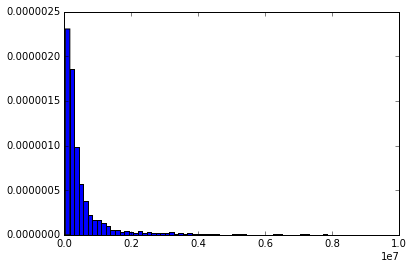

In [87]:
plt.hist(artist_plays.values(), bins=100, normed=True)
plt.xlim(0, 1e7)
#plt.ylim(0,.1)
#plt.vlines(np.mean(artist_plays.values()), 0, 600, color="red")
#plt.vlines(np.median(artist_plays.values()), 0, 600, color="green")

## Matrix Factorization

In [ ]:
users_map_dict = dict(zip(unique_users, np.arange(len(unique_users)))) 
artists_map_dict = dict(zip(unique_artists, np.arange(len(unique_artists)))) 

In [ ]:
train_mat = np.zeros((len(unique_users), len(unique_artists)))

In [ ]:
for user in unique_users:
    df_subset = df_train.loc[user,:]
    user_ind = users_map_dict[user]
    print user_ind
    for artist, play in df_subset.values:
        artist_ind = artists_map_dict[artist]
        train_mat[user_ind, artist_ind] = play

In [52]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.2):
    Q = Q.T
    for step in xrange(steps):
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in xrange(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

In [53]:
R = [
    [5,3,0,1],
    [4,0,0,1],
    [1,1,0,5],
    [1,0,0,4],
    [0,1,5,4],
    ]
R = np.array(R)

In [54]:
R

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

In [55]:
N = len(R)
M = len(R[0])
K = 2

In [56]:
P = np.random.rand(N,K)
Q = np.random.rand(M,K)

In [57]:
nP, nQ = matrix_factorization(R, P, Q, K)

In [58]:
nR = np.dot(nP, nQ.T)
nR

array([[ 4.76910283,  2.83243589,  3.50331827,  1.01905973],
       [ 3.82497323,  2.28476874,  3.00304134,  0.9983004 ],
       [ 1.02584615,  0.93337708,  5.54831743,  4.70914571],
       [ 0.98422044,  0.84656413,  4.59920226,  3.84010498],
       [ 1.34165289,  1.05837086,  4.85470595,  3.90986853]])

## Music Brainz Specific

In [10]:
musicbrainzngs.set_useragent("CS181 Project", "version 2", contact=None)

In [11]:
artist_id = "c5c2ea1c-4bde-4f4d-bd0b-47b200bf99d6"

In [92]:
result = musicbrainzngs.get_artist_by_id(unique_train_artists[1],
              includes=["tags", "ratings"])
#for release_group in result["artist"]["release-group-list"]:
#    print("{title} ({type})".format(title=release_group["title"], type=release_group["type"]))

In [93]:
print result

{'artist': {'rating': {'rating': '5', 'votes-count': '2'}, 'name': 'CunninLynguists', 'area': {'sort-name': 'United States', 'iso-3166-1-code-list': ['US'], 'id': '489ce91b-6658-3307-9877-795b68554c98', 'name': 'United States'}, 'country': 'US', 'life-span': {'begin': '2000-03'}, 'tag-list': [{'count': '1', 'name': 'american'}, {'count': '1', 'name': 'conscious hip hop'}, {'count': '1', 'name': 'hip hop'}, {'count': '1', 'name': 'hip-hop'}, {'count': '1', 'name': 'political hip hop'}, {'count': '1', 'name': 'rap'}, {'count': '1', 'name': 'southern hip hop'}], 'sort-name': 'CunninLynguists', 'type': 'Group', 'id': '69c4cc43-8163-41c5-ac81-30946d27bb69'}}


In [94]:
result["artist"]["tag-list"][0]["name"]

'american'